# Clustering with K-means

## » Understanding centroid-based algorithms

### • example of euclidean distance

In [1]:
import numpy as np
import pandas as pd
# creates 2 arrays of height, weight and age
A = np.array([165, 55, 70])
B = np.array([185, 60, 30])

### • calculate the difference between vectors

In [2]:
# subtract the vectors
D = (A - B)
# square it all
D = D**2
# square root the sum of the squared vector D
D = np.sqrt(np.sum(D))
print(D)

45.0


## » Creating an example with image data

### • Import image data

In [3]:
from sklearn.datasets import load_digits
digits = load_digits()
X = digits.data
ground_truth = digits.target

### process the data using PCA

In [4]:
from sklearn.decomposition import PCA
from sklearn.preprocessing import scale
# creates the PCA algorithm with 30 components
pca = PCA(n_components=30)
# fit and transfrom scaled X (centered in mean and 
# spread according to its variance)
Cx = pca.fit_transform(scale(X))
# sum of the PCA variance ratio produced by the PCA algorithm
var_ratio = sum(pca.explained_variance_ratio_)
print(f"Explained Variance {var_ratio:.3f}")

Explained Variance 0.893


### • clustering the transformed dataset

In [5]:
from sklearn.cluster import KMeans
# makes a Kmeans clustering algorithm
# n_cluster para. is the K number of centroids to find
# n_init para.  deterimines number of iteration with 
# different starting centroid
clustering = KMeans(n_clusters=10,
                    n_init=10, random_state=1)
# fitting the Kmeans clustering algorithm to the
# already transformed dataset
clustering.fit(Cx)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=10, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=1, tol=0.0001, verbose=0)

## » Looking for optimal solutions

### • comparing the result with the ground truth with crosstab

In [6]:
 # stacks the ground_truth and the clustering labels into an 2D array
ms = np.column_stack((ground_truth, clustering.labels_))
# creates a df with the stacked array with respective columns name
df = pd.DataFrame(ms, columns = ['Ground truth', 'Clusters'])
# creates a crosstable between the entry in ground truht and cluster
# margins para. used to show the sum of each rows and columns
pd.crosstab(df['Ground truth'], df['Clusters'], margins=True)

Clusters,0,1,2,3,4,5,6,7,8,9,All
Ground truth,,,,,,,,,,,
0,0,0,0,177,1,0,0,0,0,0,178
1,0,96,58,0,0,0,0,27,0,1,182
2,0,33,5,0,0,6,83,48,0,2,177
3,0,9,0,0,0,152,13,1,0,8,183
4,0,4,7,0,157,0,0,0,9,4,181
5,3,61,2,0,2,71,41,0,0,2,182
6,175,4,1,1,0,0,0,0,0,0,181
7,0,0,3,0,0,0,7,0,18,151,179
8,3,99,15,0,0,47,8,0,0,2,174


### • counting inertia rate of change using loop

In [7]:
inertia = []
# the range is smallest and the largest number of clusters used
# in the algorithm
for k in range(1,21):
    clustering = KMeans(n_clusters=k,
                        n_init=10, random_state=1)
    clustering.fit(Cx)
    # appends the inertia value of each number of clusters
    inertia.append(clustering.inertia_)
# counts the inertia rate of change
delta_inertia = np.diff(inertia) * -1

### • ilustrate the inertia rate of change

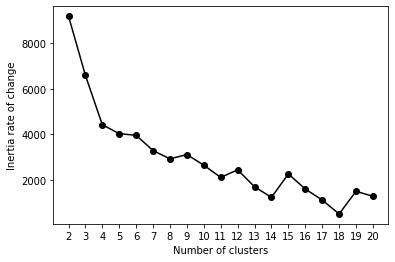

In [8]:
import matplotlib.pyplot as plt
%matplotlib inline
# plt.figure used when we want to tweak the size of the figure 
# and when we want to add multiple Axes objects in a single figure
plt.figure()
x_range = [k for k in range(2, 21)]
plt.xticks(x_range)
plt.plot(x_range, delta_inertia, 'ko-')
plt.xlabel('Number of clusters')
plt.ylabel('Inertia rate of change')
plt.show()

## » Clustering big data

### • using original K-means clustering which later will be compared with the MiniBatchKMeans

In [9]:
# determines the number of the initial cluster
k = 10
# make the K-means cluster algorithm
clustering = KMeans(n_clusters=k,
                    n_init=10, random_state=1)
# fit the Cx with K-means cluster algorithm
clustering.fit(Cx)
# assign the value of the inertia of the K number of clusters 
kmeans_inertia = clustering.inertia_
print(f"K-means inertia {kmeans_inertia:.1f}")

K-means inertia 57809.1


### • using MiniBatchKMeans clustering

In [10]:
from sklearn.cluster import MiniBatchKMeans
# builds a MiniBatchKMeans cluster algorithm
batch_clustering = MiniBatchKMeans(n_clusters=k,
                                   random_state=1)
# determines the number of observations each batch
batch = 100
# makes a for loop which jumps every 100 (batch)
for row in range(0, len(Cx), batch):
    # an if condition to determine if in the end of the data
    # the batch is too large, it will use the remaining data
    if row+batch < len(Cx):
        feed = Cx[row:row+batch,:]
    else:
        feed = Cx[row:,:]
    # feeds the algorithm with the feed, batch by batch
    # partial_fit fits a K-means clustering on each batch
    # and using the previous called centroids
    batch_clustering.partial_fit(feed)
# using score() to gather all of the data and counts its inertia 
batch_inertia = batch_clustering.score(Cx) * -1

print(f"MiniBatchKMeans inertia: {batch_inertia:.1f}")

MiniBatchKMeans inertia: 64512.4


# Performing Hierarchical Clustering

## » Using a hierarchical cluster solution

### • using ward linkage and Eucladian distance with handwritten digits

In [11]:
from sklearn.cluster import AgglomerativeClustering
# creates the hierarchical clustering algorithm
# c_clusters para. determines the number of clusters produced
# affinity para. determines the type of distance metrics
# linkage para. determines the type of linkage
Hclustering = AgglomerativeClustering(n_clusters=10,
                                      affinity='euclidean',
                                      linkage='ward')
# fitting the Cx with the hierarchical clustering algorithm 
Hclustering.fit(Cx)
# stacks the ground_truth and the clustering labels into an 2D array
ms = np.column_stack((ground_truth, Hclustering.labels_))
df = pd.DataFrame(ms, columns = ['Ground truth', 'Clusters'])
pd.crosstab(df['Ground truth'], df['Clusters'], margins=True)

Clusters,0,1,2,3,4,5,6,7,8,9,All
Ground truth,,,,,,,,,,,
0,0,0,0,0,0,178,0,0,0,0,178
1,5,27,0,150,0,0,0,0,0,0,182
2,0,165,0,10,0,0,1,0,0,1,177
3,0,5,0,23,0,0,0,0,0,155,183
4,1,0,0,3,0,0,1,11,165,0,181
5,163,1,2,3,0,0,0,0,0,13,182
6,0,0,181,0,0,0,0,0,0,0,181
7,1,0,0,1,169,0,0,8,0,0,179
8,2,3,1,167,0,0,0,0,0,1,174


## » Using a two-phase clustering solution

### • the first phase (with K-means)

In [12]:
from sklearn.cluster import KMeans
# using 50 clusters as the first phase using K-means
clustering = KMeans(n_clusters=50,
                    n_init=10,
                    random_state=1)
clustering.fit(Cx)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=50, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=1, tol=0.0001, verbose=0)

### • keeps the track of the cases assigned

In [13]:
# list all of the centroids for each feature from each clusters 
Kx = clustering.cluster_centers_
# mapping every cases/entries with its 50 K-means clustering labels
Kx_mapping = {case:cluster for case, 
              cluster in enumerate(clustering.labels_)}
# list of the unique values (vlusters) in Kx_mapping dict.
# just to be sure
print(list(set(Kx_mapping.values())))

[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49]


### • second phase (with agglomerative clustering)

In [14]:
from sklearn.cluster import AgglomerativeClustering
# uses hierarchical clustering algorithm with
# 'cosine' as its distance metric 
# the uses of 'cosine' is because the data used to be fitted
# later has a lot of feature (30)
# 'complete' as its linkage
Hclustering = AgglomerativeClustering(n_clusters=10,
                                      affinity='cosine',
                                      linkage='complete')
# fitting the newly contructed dataset from the first phase using
# K-means with the hierarchical clustering algorithm
Hclustering.fit(Kx)

AgglomerativeClustering(affinity='cosine', compute_full_tree='auto',
                        connectivity=None, distance_threshold=None,
                        linkage='complete', memory=None, n_clusters=10)

### • makes the final mapping

In [15]:
# creates a dict to map the 50 K-means labels to be
# the 10 hierarchical clustering labels
H_mapping = {case:cluster for case,
             cluster in enumerate(Hclustering.labels_)}
# maps of all the cases/entries from the original dataset
# that have the 50 K-means clustering labels and maps it
# again to be the 10 hierarchical clustering labels
final_mapping = {case:H_mapping[Kx_mapping[case]]
                 for case in Kx_mapping}

### • evaluate the solution

In [16]:
# comparing my solution for extracting the final 10 labels from
# the key(original data index + !)
mine = list(final_mapping.values())
books = [final_mapping[n] for n in range(max(final_mapping)+1)]

# zip() used to assign the value of mine and books one at a time
# to a and b
for a, b in zip(mine, books):
    if a == b:
        pass
    else:
        print("not same")
            
ms = np.column_stack((ground_truth, list(final_mapping.values())))
df = pd.DataFrame(ms, columns=['Ground truth', 'Clusters'])
pd.crosstab(df['Ground truth'], df['Clusters'], margins=True)

Clusters,0,1,2,3,4,5,6,7,8,9,All
Ground truth,,,,,,,,,,,
0,0,0,177,1,0,0,0,0,0,0,178
1,57,0,0,96,0,0,1,1,0,27,182
2,0,1,0,11,3,2,2,0,0,158,177
3,0,5,0,4,166,0,1,5,0,2,183
4,15,3,4,3,0,0,1,0,155,0,181
5,0,0,0,1,9,1,0,170,1,0,182
6,0,0,2,2,0,177,0,0,0,0,181
7,21,155,0,1,0,0,0,2,0,0,179
8,2,12,0,111,45,1,2,1,0,0,174


# Discovering New Groups with DBScan

### • using DBScan clustering algorithm

In [19]:
from sklearn.cluster import DBSCAN
# creates the DBScan algorithm
# eps para. determines the maximum distance between two entries that
# allows them to be part of the same neighborhood
# min_sample para. determines the minimum number of entry in a 
# neighbohood that transform them into a core point
DB = DBSCAN(eps=3.7, min_samples=15)
DB.fit(Cx)

DBSCAN(algorithm='auto', eps=3.7, leaf_size=30, metric='euclidean',
       metric_params=None, min_samples=15, n_jobs=None, p=None)

### • counting the clusters

In [30]:
# adds Counter class to count the number of data points in each cluster
from collections import Counter
# shows how many of clusters there are
print(f'No. clusters {len(np.unique(DB.labels_))}')
# counts data points in each cluster and sorts it descended
print(Counter(DB.labels_))

No. clusters 11
Counter({-1: 825, 6: 185, 0: 172, 1: 159, 2: 159, 4: 123, 5: 97, 3: 27, 9: 21, 7: 16, 8: 13})


### • tests the result of the clustering

In [31]:
ms = np.column_stack((ground_truth, DB.labels_))
df = pd.DataFrame(ms, columns=['Ground truth', 'clusters'])
pd.crosstab(df['Ground truth'], df['clusters'], margins=True)
# as you can see, almost half of the entries clustered in cluster -1
# which represents the noise

clusters,-1,0,1,2,3,4,5,6,7,8,9,All
Ground truth,,,,,,,,,,,,
0,6,172,0,0,0,0,0,0,0,0,0,178
1,68,0,88,0,26,0,0,0,0,0,0,182
2,146,0,2,0,0,0,0,0,16,13,0,177
3,74,0,4,0,0,0,0,105,0,0,0,183
4,84,0,0,0,0,0,97,0,0,0,0,181
5,157,0,0,1,0,0,0,3,0,0,21,182
6,22,0,1,158,0,0,0,0,0,0,0,181
7,56,0,0,0,0,123,0,0,0,0,0,179
8,110,0,63,0,1,0,0,0,0,0,0,174
